In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from data_loader import CIFAR_10_DataLoader

file_directory = '/Users/subhojit/Downloads/cifar-10-batches-py'
cdl = CIFAR_10_DataLoader()
xtrain_data, ytrain_data, Xtest, ytest = cdl.load_cifar_10_dataset(file_directory)

x_train = xtrain_data.astype(np.float32) / 255.0
x_train_flat = x_train.reshape(x_train.shape[0], -1) # (50000, 3072)

x_train_image_dim = x_train.reshape(-1, 32, 32, 3)

plt.imshow(x_train_image_dim[0])

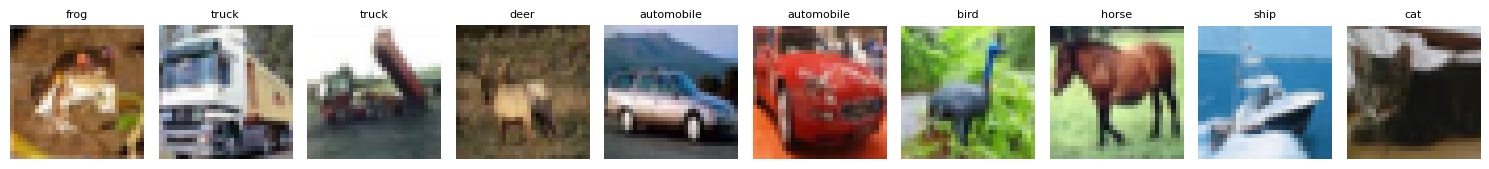

In [15]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Function to load a CIFAR-10 batch
def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as f:
        data_dict = pickle.load(f, encoding='bytes')
        images = data_dict[b'data']
        labels = data_dict[b'labels']
        images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # (N, H, W, C)
        return images, labels

# Load the first batch
images, labels = load_cifar10_batch('/Users/subhojit/Downloads/cifar-10-batches-py/data_batch_1')

# CIFAR-10 class names
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Plot the first 10 images
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i]], fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


/var/folders/5g/d5t9nrnd47z7b7djysv3l9mm0000gq/T/ipykernel_75907/2189423119.py:11: RuntimeWarning: divide by zero encountered in matmul
  projections = x_centered @ top_components.T  # shape: (50000, 10)
/var/folders/5g/d5t9nrnd47z7b7djysv3l9mm0000gq/T/ipykernel_75907/2189423119.py:11: RuntimeWarning: overflow encountered in matmul
  projections = x_centered @ top_components.T  # shape: (50000, 10)
/var/folders/5g/d5t9nrnd47z7b7djysv3l9mm0000gq/T/ipykernel_75907/2189423119.py:11: RuntimeWarning: invalid value encountered in matmul
  projections = x_centered @ top_components.T  # shape: (50000, 10)


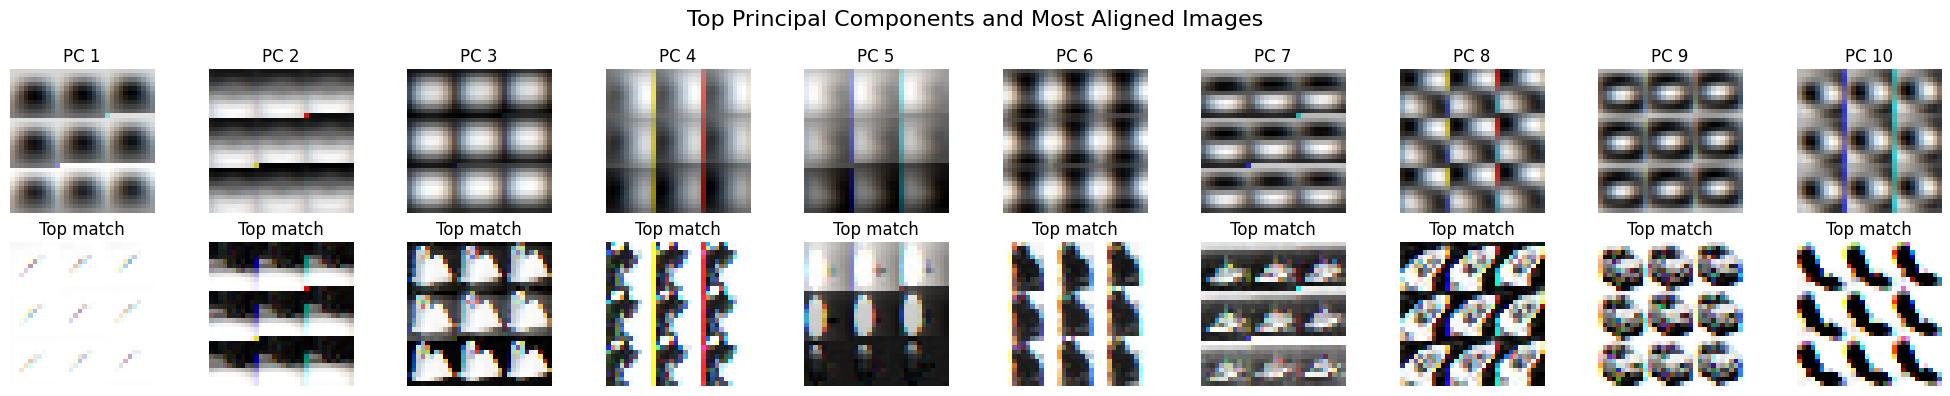

In [10]:
x_centered = x_train_flat - np.mean(x_train_flat, axis=0)

# Compute PCA
pca = PCA()
pca.fit(x_centered)

# Top 10 principal components
top_components = pca.components_[:10]

# Project all images onto each component
projections = x_centered @ top_components.T  # shape: (50000, 10)

# Find the image with the maximum projection on each PC
max_proj_indices = np.argmax(projections, axis=0)

# Plot each PC and corresponding max-projection image
plt.figure(figsize=(20, 4))
for i in range(10):
    # Plot the eigenvector (as image)
    plt.subplot(2, 10, i + 1)
    pc_img = top_components[i].reshape(32, 32, 3)
    pc_img = (pc_img - pc_img.min()) / (pc_img.max() - pc_img.min())
    plt.imshow(pc_img)
    plt.title(f"PC {i+1}")
    plt.axis('off')

    # Plot the original image (use unflattened x_train)
    plt.subplot(2, 10, i + 11)
    orig_img = x_train[max_proj_indices[i]].reshape(32, 32, 3)
    plt.imshow(orig_img)
    plt.title("Top match")
    plt.axis('off')

plt.suptitle("Top Principal Components and Most Aligned Images", fontsize=16)
plt.tight_layout()
plt.show()